        Data Science: A Programming Approach
        Mahyar S Vaghefi
        University of Texas Arlington
        
        This document can only be used for class studies. 
        You are not allowed to share it in any public platform.

<h1 align='center' style="color: blue;">Group Project - Fall 2022</h1>

You need to work as a team for this project. Your job is to develop a predictive model that can predict whether or not a movie is a <i>Drama</i>. In order to do so you need to use the textual features of the movie stories and creat your predictive models. There are totally three different files in this project.

<ol>
    <li><b>movie_story_student_file.csv</b>: This file contains the movie stories that should be used by students for model development.</li>
    <li><b>movie_story_evaluation_file.csv</b>: This file should NOT be used for model development purposes. Students should only use this file after developing their predictive models and selecting their best final model. They then need to use their best predictive model and predict whether or not the movies in <b>movie story evaluation file.csv</b> are Drama.</li>
    <li><b>movies.csv</b>: This file contain the movie genres.</li>
</ol>

<b>Additional Note:</b> This note provides additional guideline for the project.

<b>Step 1:</b> Explore all files to become familiar with the dataset <br />
<b>Step 2:</b> There are 20,000 movies in `movie_story_student_file.csv`file. Use the `movies.csv` file to determine whether a movie is Drama or not. The final output of this step should be development of a dataframe file that contains three columns: 1) movieId, 2) story, 3) DramaGenre. The value for the third column should be in a binary format. If the movie is drama the value should be 1, otherwise 0. Name the new file as `main_dataset`. <br />
<b>Step 3:</b> If you want to just have one train and one test set, then split the `main_dataset` to train and test sets. Otherwise you can use cross validation methods.  <br />
<b>Step 4:</b> Use your supervised learning and text analysis knowledge to develope different predictive models (i.e. logestic regression, random forest, ...). Test the performance of your models in terms of accuracy, precision, recall, and F1 scores. <br />
<b>Step 5:</b> Choose one of your best models (only one). Then use the full data available in `main dataset` to train that model.<br />
<b>Step 6:</b> Prepare data in `movie_story_evaluation_file.csv` for prediction. You need to perform the exact same steps that you have done in <b>Step 2</b> to prepare this new dataset. Name the new dataset as `evaluation_dataset`. <br />
<b>Step 7:</b> Use your selected model in Step 5 to predict whether or not movies in `evaluation_dataset` are Drama movies. <br />
<b>Step 8:</b> Report the final accuracy, precision, recall and F1 score. <br />

Keep in mind that the above steps are only provide guidelines. There are more detail works in this project that should be identified by students. 

<b>Extra Credit</b> The group with the best prediction model is going to get extra points.

### Output

<ul>
    <li>Make sure to put descriptive comments on your code</li>
    <li>Use the markdown cell format in Jupiter to add your own interpretation to the result in each section.</li>
    <li>Make sure to keep the output of your runs when you want to save the final version of the file.</li>
    <li>The final submited file should be very well structured and should have a consistent flow of analysis.</li>
    <li>You may want to use an additional word document to report the result of your analysis</li>
</ul>

#### Due Date: Dec 2 2022 at 11:59 AM

<table style="width:400px;height:200px;border:1px black solid; background-color:white">
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Comprehensiveness</th>
        <td style="text-align:center;border:1px black solid"><b>30%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Correctness</th>
        <td style="text-align:center;border:1px black solid"><b>30%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Complete Report</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Clear Code</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:center;border:1px black solid;color:red"><u>Total</u></th>
        <td style="text-align:center;border:1px black solid;color:red"><b stlyle="color:red">100%</b></td>
    </tr>
</table>

## <u>Project Objective</u>

<p>To predict whether or not a movie is a drama by creating a set of predictive models.</p>

In [1]:
import pandas as pd
import numpy as np
import re

## <u>Data Description</u>

In [2]:
# Step 1
# Loading all 3 data sets
movies=pd.read_csv('movies.csv')
movie_story=pd.read_csv('movie_story_student_file.csv')
movies_evaluation=pd.read_csv('movie_story_evaluation_file.csv')

<u>Initial Raw Data Observation:</u> 
<p>Our first dataset, 'movies.csv' file contains 23,498 rows and 3 columns containing information regarding movieID, movie title and genres. Our 2nd dataset, 'movie_story_student_file.csv' file contains almost 20,000 rows and 2 columns providing additional information about the sotry of a particular movie. We are going to use these two dataset to train different predictive models dividing it into train and test sets: 70% train and 30% test data. Our 3rd dataset, 'movie_story_evaluation_file.csv' file contains 3,498 rows and and 2 columns names movieID and story of each movei. </p>

In [3]:
# Step 2
# Merging 2 datasets(movies and movie_story_student_file)
movies_new=pd.merge(movie_story, movies, left_on='movie_id', right_on='movieId', how='inner')
movies_new=movies_new.drop(['movieId', 'title'], axis=1)
movies_new.head(3)

,movie_id,story,genres
0,131072,A girl who always tends to fall in love with t...,Comedy
1,196609,"Bigfoot has come to the town of Ellwood City, ...",Comedy|Horror
2,131074,"At an altitude of 18,000 feet, Alaska\'s Mount...",Documentary


In [4]:
# Step 2
# Creating the dataframe by removing unwanted characters
main_dataset=movies_new[(movies_new.genres!='(no genres listed)') & (movies_new.story!='No overview found.') & (movies_new.story!='No movie overview available.')]
main_dataset=main_dataset.dropna()
new_story=[]
for word in main_dataset['story']:
    word=re.sub(r'\\x..', ' ', word) #Removing unwanted charaters in form '\xe2\x80\x93'
    word=re.sub(r'[^\w]', ' ', word) #Removing the symbols like '.', ':', ',' and '-' 
    word=re.sub(' s ', ' ', word) #Removing any single 's' characters 
    word=" ".join(word.split()) #Removing multiple unwanted spaces
    word=word.lower() #Converting all characters to lowercase
    new_story.append(word)
main_dataset.drop(['story'], axis=1, inplace=True)
main_dataset['story']=new_story

In [5]:
# Step 2
# Taking binary values for DramaGenres column
main_dataset["DramaGenre"]=main_dataset["genres"].map(lambda x:1 if "Drama" in x else 0)
main_dataset.shape

(18869, 4)

In [6]:
# Dropping genres column and observing the new dataset 
#main_dataset.to_csv('final-re.csv')
main_dataset=main_dataset.drop(columns=['genres']) 
main_dataset.head(15)

,movie_id,story,DramaGenre
0,131072,a girl who always tends to fall in love with t...,0
1,196609,bigfoot has come to the town of ellwood city p...,0
2,131074,at an altitude of 18 000 feet alaska mount st ...,0
3,196611,in her first special since 2003 ellen revisits...,0
4,196613,mike and sulley are back at monsters universit...,0
5,131080,when lady tremaine steals the fairy godmother ...,0
6,131084,film that mixes live action and animation from...,0
7,196621,when a beautiful ballerina dancer adriana mena...,0
8,131090,jonas is 18 years old and has had to repeat se...,0
9,196629,when ex soldier turned mercenary john gold lea...,0


<u>Data Processing:</u> 
<p>In step 2, we have merged 'movies.csv' and 'movie_story_student_file.csv' file keeping only 3 columns: movie_id, story and genres. Then, we have created a dataframe by dropping null values from genres and story columns where genre type and story overview was not mentioned or available. We have also scaled our dataframe by using  regular expression to remove unwanted characters, symbols, signs and spaces. In next step, we have taken binary values for DramaGenre column: 1 means drama, otherwise 0. After removing all null values from genre and story column, our new file 'main_dataset' have 18,869 rows and 3 columns: movie_id, story and DramaGenre.</p>

## <u>Building a Benchmark Model</u>

<p>In this step, we have created a benchmark model using logistic regression model. We will use this model later for a logical comparison with other models while selecting our best model for final prediction. And we can observe that the accuracy for our benchmark model is 67.12%. </p>

In [6]:
# Converting main_dataset into a vector
from sklearn.feature_extraction.text import CountVectorizer
vect_base = CountVectorizer(lowercase=False)
vect_base.fit(main_dataset.story)
X_base = vect_base.transform(main_dataset.story)

In [7]:
# Building benchmark model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

y_base = main_dataset.DramaGenre

X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, y_base, test_size=0.3, random_state=0, stratify=y_base)
model_base = LogisticRegression(max_iter=1000)
model_base.fit(X_train_base,y_train_base)
y_test_hat_base = model_base.predict(X_test_base)
print('accuracy_score is: ',accuracy_score(y_test_base,y_test_hat_base))
print('Classification Report: \n',classification_report(y_test_base,y_test_hat_base))

accuracy_score is:  0.6710828475534358
Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.72      0.71      3140
           1       0.63      0.61      0.62      2521

    accuracy                           0.67      5661
   macro avg       0.67      0.67      0.67      5661
weighted avg       0.67      0.67      0.67      5661



In [8]:
# Installing stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\faria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
# Removing stopwords from the distribution
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def filter_stopwords(text):
    filtered_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(filtered_text)
main_dataset['story'] = main_dataset.story.apply(filter_stopwords)

In [10]:
main_dataset.head(10)

,movie_id,genres,story,DramaGenre
0,131072,Comedy,girl always tends fall love wrong guy meets on...,0
1,196609,Comedy|Horror,bigfoot come town ellwood city pa causing big ...,0
2,131074,Documentary,altitude 18 000 feet alaska mount st elias des...,0
3,196611,Comedy,first special since 2003 ellen revisits road s...,0
4,196613,Animation|Children|Comedy|Fantasy,mike sulley back monsters university fun fille...,0
5,131080,Animation|Children|Fantasy|Musical|Romance,lady tremaine steals fairy godmother wand chan...,0
6,131084,Adventure|Comedy|Fantasy,film mixes live action animation hui buh chara...,0
7,196621,Horror,beautiful ballerina dancer adriana mena kendra...,0
8,131090,Comedy,jonas 18 years old repeat several years educat...,0
9,196629,Action,ex soldier turned mercenary john gold learns m...,0


## <u>Visualization After Processing</u>

<p>After processing and scaling our main dataset, we have applied some visualization techniques to observe our training dataset to have a better understanding.</p>

#### Bar Chart

0    10467
1     8402
Name: DramaGenre, dtype: int64

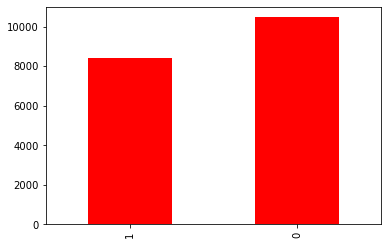

In [11]:
# Visualization using Bar Chart
%matplotlib inline
main_dataset.DramaGenre.value_counts().sort_values().plot(kind='bar', color='red')
main_dataset.DramaGenre.value_counts()

<p>From bar chart, we can notice that around 8400 movies are falling under drama category and rest of the movies are categorized as non-drama. </p>

#### Pie Chart

0    10467
1     8402
Name: DramaGenre, dtype: int64

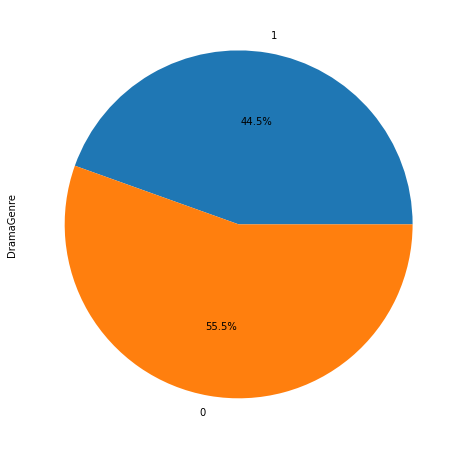

In [12]:
# Visualization using Pie Chart
main_dataset.DramaGenre.value_counts().sort_values().plot(kind='pie', y='2010', legend=False, figsize=(8, 8),autopct='%1.1f%%')
main_dataset.DramaGenre.value_counts()

<p>Now if we look at the pie chart then we can conclude that 44.5% movies are drama and 55.5% movies are non-drama category in our main dataset.</p>

#### Word Cloud

There are 4162388 words in the combination of all stories.


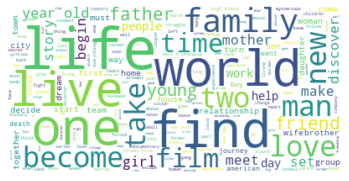

In [12]:
# Generating Word Cloud
from wordcloud import WordCloud,STOPWORDS
story = main_dataset.story
text = " ".join(story for story in main_dataset.story)
print ("There are {} words in the combination of all stories.".format(len(text)))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white")
wordcloud.generate(text)

import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

<p>We have also used wordcloud for presentation of word frequency in our textual data. By observing and analyzing the word cloud, we can summarize that there are in total 4162388 words in the combination of all stories. Usually the bigger and bolder the word appears, the more often it's mentioned within a given text and the more important it is which depicts that life, family, live, one, world and find are some of the more frequent appearing words in our dataset.</p>

In [ ]:
# Installing yellowbrick package
!pip install yellowbrick

#### Term Frequesncy Distribution

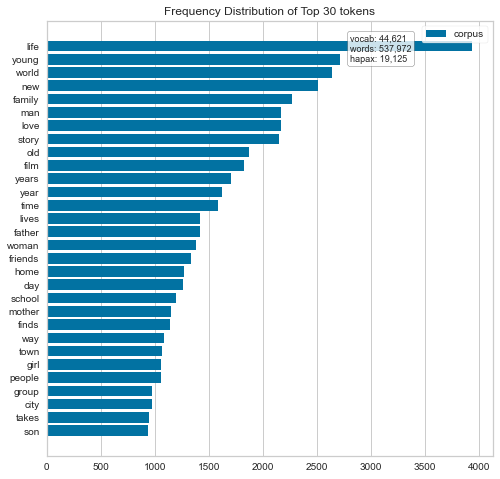

<AxesSubplot:title={'center':'Frequency Distribution of Top 30 tokens'}>

In [13]:
# Term Frequesncy Distribution
from yellowbrick.text.freqdist import FreqDistVisualizer 
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Find the Document Term Frequency Matrix 
vect = CountVectorizer(stop_words='english')
V = vect.fit_transform(main_dataset.story)

# Get all features (tokens)
features = vect.get_feature_names_out()

# Use yellowbrick package for visualization of top 30 tokens
fig, ax = plt.subplots(figsize=(8, 8))
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(V)
visualizer.poof()

<p>Here, we have used term frequency to examine the importance of words in a text or set of texts by measuring how often certain words appear. We can explain that "life" word is coming almost 4000 times in our dataset which is the highest number here, and the next frequently appearing word are "young" and "world" which are iterating almost 2700 and 2600 times respectively.</p>

## <u>Applying Text Analysis Techniques</u>

<p>Now, we are going to apply some text analysis method to futher build our training models and conduct the prediction using the best model found.</p>

### Stemming

In [14]:
# Step 3 & 4
# Applying stemming approach
from nltk.stem import PorterStemmer
def stemming(text):
    stemmer = PorterStemmer()
    return " ".join([stemmer.stem(w) for w in text.split()])

story_stem = main_dataset.copy(deep=True)
story_stem['story']= main_dataset["story"].apply(stemming)
story_stem.head(10)

,movie_id,story,DramaGenre
0,131072,girl alway tend fall love wrong guy meet one b...,0
1,196609,bigfoot come town ellwood citi pa caus big pro...,0
2,131074,altitud 18 000 feet alaska mount st elia desti...,0
3,196611,first special sinc 2003 ellen revisit road sta...,0
4,196613,mike sulley back monster univers fun fill week...,0
5,131080,ladi tremain steal fairi godmoth wand chang hi...,0
6,131084,film mix live action anim hui buh charact crea...,0
7,196621,beauti ballerina dancer adriana mena kendra ca...,0
8,131090,jona 18 year old repeat sever year educ accept...,0
9,196629,ex soldier turn mercenari john gold learn murd...,0


### Lemmatization

In [15]:
# Step 3 & 4
# Applying lemmatization method
from nltk.stem import WordNetLemmatizer
def lemmatization(text):
    Lemmatizer = WordNetLemmatizer()
    return " ".join([Lemmatizer.lemmatize(w) for w in text.split()])

story_lemma = main_dataset.copy(deep=True)
story_lemma['story']= main_dataset["story"].apply(lemmatization)
story_lemma.head(10)

,movie_id,story,DramaGenre
0,131072,girl always tends fall love wrong guy meet one...,0
1,196609,bigfoot come town ellwood city pa causing big ...,0
2,131074,altitude 18 000 foot alaska mount st elia dest...,0
3,196611,first special since 2003 ellen revisits road s...,0
4,196613,mike sulley back monster university fun filled...,0
5,131080,lady tremaine steal fairy godmother wand chang...,0
6,131084,film mix live action animation hui buh charact...,0
7,196621,beautiful ballerina dancer adriana mena kendra...,0
8,131090,jonas 18 year old repeat several year educatio...,0
9,196629,ex soldier turned mercenary john gold learns m...,0


In [16]:
# Step 3 & 4
# Defining X and y
X = main_dataset.story
y = main_dataset.DramaGenre

In [17]:
# Step 3 & 4
#CountVectorizer for lemmatization and stemming words
from sklearn.feature_extraction.text import CountVectorizer
vect1 = CountVectorizer(ngram_range=(1,3)).fit(story_stem.story)    #CountVectorizer for stemming words
CV_stem = vect1.transform(story_stem.story)

vect2 = CountVectorizer(ngram_range=(1,3)).fit(story_lemma.story)   #CountVectorizer for lemmatization words
CV_lemma = vect2.transform(story_lemma.story)

#CountVectorizers with TruncatedSVD:
from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD(n_components = 100)
CV_stem_tsvd = tsvd.fit_transform(CV_stem)                 # CountVectorizer with TSVD for stemming words
CV_lemma_tsvd = tsvd.fit_transform(CV_lemma)                 # CountVectorizer with TSVD for lemmatization words

In [18]:
# Step 3 & 4
#TF-IDF Vectorizer for lemmatization and stemming words
from sklearn.feature_extraction.text import TfidfVectorizer

vect3 = TfidfVectorizer(ngram_range=(1,3)).fit(story_stem.story)
TF_stem = vect3.transform(story_stem.story)

vect4 = TfidfVectorizer(ngram_range=(1,3)).fit(story_lemma.story)
TF_lemma = vect4.transform(story_lemma.story)

#TF-IDF with TruncatedSVD:
TF_stem_tsvd = tsvd.fit_transform(TF_stem)                 # TF-IDF with TSVD for stemming words
TF_lemma_tsvd = tsvd.fit_transform(TF_lemma)                 # TF-IDF with TSVD for lemmatization words

## <u>Building and Training Different Models</u>

<p>Explanation: At first, we have imported, downloaded and installed all the necessary packages to build our models and to further test the performance of our models. We have used 6 supervised learning techniques to build the models: logistic regression, knn, random forest, sgd classifier, multinomial naive bayes and decision tree. We have created a function for each model to later call it for a smooth comparison purpose. We have used 70% of our data as training data and 30% as a test data keeping random state and <u>stratify=y</u> to to retain the same proportion of classes in the train and test sets that are found in the entire original dataset. Then, we have fitted our training dataset into the model and predicted y_test_hat. Atlast, we have done found the accuracy , classification report, stratified cross validation and mean accuracy scores to test the performance of individual model and for a logical comparison among all 6 models.</p>

In [19]:
# Step 3 & 4
# Importing all the necessary packages for model building and testing
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

### 1. Logistic Regression Model:

In [20]:
from sklearn.model_selection import GridSearchCV
grid={"C":[1, 10, 100], "penalty":["l2"], "solver":['liblinear','newton-cg','sag'], 'class_weight':[{ 0:0.95, 1:0.05 }, { 0:0.55, 1:0.45 }, { 0:0.45, 1:0.55 }]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=3,scoring='f1_micro')
result=logreg_cv.fit(CV_stem, y)
print(result.best_params_)
#Best Parameter: solver = 'sag'

In [21]:
def logreg(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
    model = LogisticRegression(max_iter=1000, solver='sag')
    model.fit(X_train,y_train)
    y_test_hat = model.predict(X_test)
    print('accuracy_score is: ',accuracy_score(y_test,y_test_hat))
    print('Classification Report: \n',classification_report(y_test,y_test_hat))
    
    cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    accuracy = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print("Stratified Cross Validation Scores: {}".format(accuracy))
    print("Mean Accuracy Score: {}".format(np.mean(accuracy)))

### 2. KNN Model:

In [22]:
Xk_train, Xk_test, yk_train, yk_test = train_test_split(CV_lemma, y, test_size=0.3, random_state=0)
model_k = KNeighborsClassifier()
param_grid = {'n_neighbors': [1,2,3,4,5,6,7]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(model_k, param_grid, cv = cv, scoring='accuracy',
            return_train_score=True)
grid.fit(Xk_train, yk_train)

print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Vlidation Score: {}".format(grid.best_score_))

Best Parameter: {'n_neighbors': 5}
Best Cross Vlidation Score: 0.5560266524419414


In [23]:
def KNN(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, y_train);
    y_test_hat = model.predict(X_test)
    print('accuracy_score is: ',accuracy_score(y_test,y_test_hat))
    print('Classification Report: \n',classification_report(y_test,y_test_hat))   

### 3. Random Forest Model:

In [24]:
def rf(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
    model=RandomForestClassifier(n_estimators=100, random_state=0)
    model.fit(X_train,y_train)
    y_test_hat = model.predict(X_test)
    print('accuracy_score is: ',accuracy_score(y_test,y_test_hat))
    print('Classification Report: \n',classification_report(y_test,y_test_hat))

    cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    accuracy = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print("Stratified Cross Validation Scores: {}".format(accuracy))
    print("Mean Accuracy Score: {}".format(np.mean(accuracy)))

### 4. Stochastic Gradient Descent Classifier Model:

In [25]:
def sgdc(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
    model = SGDClassifier(max_iter=1000)
    model.fit(X_train, y_train)
    y_test_hat = model.predict(X_test)
    print('accuracy_score is: ',accuracy_score(y_test,y_test_hat))
    print('Classification Report: \n',classification_report(y_test,y_test_hat))
          
    cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    accuracy = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print("Stratified Cross Validation Scores: {}".format(accuracy))
    print("Mean Accuracy Score: {}".format(np.mean(accuracy)))

### 5. Multinomial Naive Bayes Model:

In [26]:
def MNB(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
    model= MultinomialNB()
    model.fit(X_train, y_train)
    y_test_hat = model.predict(X_test)
    print('accuracy_score is: ',accuracy_score(y_test,y_test_hat))
    print('Classification Report: \n',classification_report(y_test,y_test_hat))
          
    cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    accuracy = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print("Stratified Cross Validation Scores: {}".format(accuracy))
    print("Mean Accuracy Score: {}".format(np.mean(accuracy)))    

### 6. Decision Tree Model:

In [27]:
def Tree(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    model = DecisionTreeClassifier()
    model.fit(X_train,y_train)
    y_test_hat = model.predict(X_test)
    print('accuracy_score is: ',accuracy_score(y_test,y_test_hat))
    print('Classification Report: \n',classification_report(y_test,y_test_hat))
          
    cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    accuracy = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print("Stratified Cross Validation Scores: {}".format(accuracy))
    print("Mean Accuracy Score: {}".format(np.mean(accuracy))) 

<b>Running all 8 Logistic Regression models</b>

In [28]:
print('For CV_stem:')
logreg(CV_stem, y)
print('\nFor CV_lemma:')
logreg(CV_lemma, y)
print('\nFor CV_stem_tsvd:')
logreg(CV_stem_tsvd, y)
print('\nFor CV_lemma_tsvd:')
logreg(CV_lemma_tsvd, y)
print('\nFor TF_stem:')
logreg(TF_stem, y)
print('\nFor TF_lemma:')
logreg(TF_lemma, y)
print('\nFor TF_stem_tsvd:')
logreg(TF_stem_tsvd, y)
print('\nFor TF_lemma_tsvd:')
logreg(TF_lemma_tsvd, y)

For CV_stem:
accuracy_score is:  0.6970499911676382
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.75      0.73      3140
           1       0.67      0.63      0.65      2521

    accuracy                           0.70      5661
   macro avg       0.69      0.69      0.69      5661
weighted avg       0.70      0.70      0.70      5661

Stratified Cross Validation Scores: [0.70164282 0.69475358 0.70058294 0.70349762 0.70553936]
Mean Accuracy Score: 0.7012032612272708

For CV_lemma:
accuracy_score is:  0.6988164635223458
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.75      0.73      3140
           1       0.67      0.64      0.65      2521

    accuracy                           0.70      5661
   macro avg       0.70      0.69      0.69      5661
weighted avg       0.70      0.70      0.70      5661

Stratified Cross Validation Scores: [0.69687334 0.6950185

<p>In this step, we have called all 8 logistic regression models and summarized the mean accuracy score in below table. After in depth analysis of all the performance scores, we can clearly notice that CV_lemma is the best model with highest mean accuracy of 70.22%. Now lets compare this model with other models' performance.</p>

<table style="width:400px;height:200px;border:1px black solid; background-color:white">
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">logreg(CV_stemma)</th>
        <td style="text-align:center;border:1px black solid"><b>70.12%</b></td>
     </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">logreg(CV_lemma)</th>
        <td style="text-align:center;border:1px black solid"><b>70.22%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">logreg(CV_stem_tsvd)</th>
        <td style="text-align:center;border:1px black solid"><b>66.90%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">logreg(CV_lemma_tsvd)</th>
        <td style="text-align:center;border:1px black solid"><b>66.54%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">logreg(TF_stem)</th>
        <td style="text-align:center;border:1px black solid"><b>68.92%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid"><b>logreg(TF_lemma)</b></th>
        <td style="text-align:center;border:1px black solid"><b>68.37%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid"><b>logreg(TF_stem_tsvd)</b></th>
        <td style="text-align:center;border:1px black solid"><b>67.45%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid"><b>logreg(TF_lemma_tsvd)</b></th>
        <td style="text-align:center;border:1px black solid"><b>66.83%</b></td>
    </tr>
</table>

<b>Running all the models with CV_lemma</b>

<p>As CV_lemma has the best results so we have run all the models using CV_lemma next.</p>

In [30]:
print('For KNN:')
KNN(CV_lemma,y)
print('\nFor Random Forest:')
rf(CV_lemma, y)
print('\nFor SGDClassifier:')
sgdc(CV_lemma, y)
print('\nFor MultinomialNB:')
MNB(CV_lemma, y)
print('\nFor Decision Tree:')
Tree(CV_lemma, y)

For KNN:
accuracy_score is:  0.5560854972619679
Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.98      0.71      3140
           1       0.53      0.03      0.06      2521

    accuracy                           0.56      5661
   macro avg       0.54      0.50      0.38      5661
weighted avg       0.54      0.56      0.42      5661


For Random Forest:
accuracy_score is:  0.6841547429782724
Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.79      0.73      3140
           1       0.68      0.56      0.61      2521

    accuracy                           0.68      5661
   macro avg       0.68      0.67      0.67      5661
weighted avg       0.68      0.68      0.68      5661

Stratified Cross Validation Scores: [0.66931638 0.67249603 0.67461579 0.68918919 0.6954678 ]
Mean Accuracy Score: 0.6802170359193168

For SGDClassifier:
accuracy_score is:  0.68751104045221

<p>We have summarized the performance of all 6 models in below table. And we can see that logistic regression is our best model with highest accuracy of 70.22%.</p>

<table style="width:400px;height:200px;border:1px black solid; background-color:white">
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Logistice Regression Model</th>
        <td style="text-align:center;border:1px black solid"><b>70.22%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">KNN Model</th>
        <td style="text-align:center;border:1px black solid"><b>55.61%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Random Forest Model</th>
        <td style="text-align:center;border:1px black solid"><b>68.02%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">SGD Classifier Model</th>
        <td style="text-align:center;border:1px black solid"><b>69.72%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Multinomial NB Model</th>
        <td style="text-align:center;border:1px black solid"><b>69.12%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid"><b>Decision Tree Model</b></th>
        <td style="text-align:center;border:1px black solid"><b>61.05%</b></td>
    </tr>
</table>

### Topic Modeling

In [31]:
# Applying Latent Dirichlet Allocation for Topic Modeling
from sklearn.decomposition import LatentDirichletAllocation
vect5 = CountVectorizer(max_features=50, max_df=.60, 
                       stop_words="english")
LDA_lemma = vect5.fit_transform(story_lemma.story)
param_grid= {'n_components':[2,5,10,25]}
lda_search = LatentDirichletAllocation(learning_method="batch", #n_components: number of clusters (topics) we want
                                max_iter=50, random_state=0)
grid_lda = GridSearchCV(lda_search, param_grid, cv=5) 
grid_lda.fit(LDA_lemma, y)

print("Best parameters: ", grid.best_params_) 

Best parameters:  {'n_neighbors': 5}


In [32]:
lda = LatentDirichletAllocation(n_components=5, learning_method="batch",
                                max_iter=50, random_state=0) 
document_topics = lda.fit_transform(LDA_lemma)

In [33]:
logreg(document_topics,y)

accuracy_score is:  0.5859388800565272
Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.78      0.68      3140
           1       0.56      0.34      0.43      2521

    accuracy                           0.59      5661
   macro avg       0.58      0.56      0.55      5661
weighted avg       0.58      0.59      0.56      5661

Stratified Cross Validation Scores: [0.6036036  0.58108108 0.58585056 0.59009009 0.58945136]
Mean Accuracy Score: 0.5900153392350271


<p>We also wanted to expore further by applying topic modeling techniques does our model accuracy improves or not. But the result doesn't improve and the mean accuracy is quite low around 59%.</p>

### Word Embedding

In [38]:
# Applying word embedding method
from tqdm import tqdm
embeddings_index = dict()
f = open('glove.6B/glove.6B.50d.txt',encoding='utf8')
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

400000it [00:08, 48811.79it/s]


In [50]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
WE_inp = story_lemma.story
embeddings = []
for review in tqdm(WE_inp):
    #review = review.decode("utf-8")
    base_embedding = np.zeros((50,))
    word_count = 0
#     for token in word_tokenize(review):
#         token = token.lower()
#         if token in stopwords.words('english'):
#             continue
    try:
        base_embedding += embeddings_index[token]
        word_count +=1
    except:
        continue
    base_embedding = base_embedding/word_count
    embeddings.append(base_embedding)

100%|████████████████████████████████████████████████████████████████████████| 18869/18869 [00:00<00:00, 214458.66it/s]


In [51]:
WE_out = np.array(embeddings)
WE_out.shape

(18869, 50)

In [52]:
y.shape

(18869,)

In [53]:
logreg(WE_out,y)

C:\Users\srava\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\srava\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srava\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srava\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predict

accuracy_score is:  0.5546723193782017
Classification Report: 
               precision    recall  f1-score   support

           0       0.55      1.00      0.71      3140
           1       0.00      0.00      0.00      2521

    accuracy                           0.55      5661
   macro avg       0.28      0.50      0.36      5661
weighted avg       0.31      0.55      0.40      5661



C:\Users\srava\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\srava\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\srava\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\srava\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Stratified Cross Validation Scores: [0.55484897 0.55484897 0.554584   0.554584   0.55473098]
Mean Accuracy Score: 0.5547193816101379


C:\Users\srava\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


<p>Last but not the least, we have implemented word embedding method but this techniques also doesn't enhance our accuracy score, providing a mean accuracy of 55.47%.</p>

## <u>Applying Full Data to Train the Best Model</u>

<p>Here, we have applied our full data set to train the best model.</p>

In [54]:
# Step 5
# Running full data from Main_dataset

X_Train_main = CV_lemma
model_LR = LogisticRegression(max_iter=1000, solver='sag')
model_LR.fit(X_Train_main,y)


LogisticRegression(max_iter=1000, solver='sag')

## <u>Preparing Evaluation Data for Prediction</u>

<p>Following the same step as our training data, we have prepared our evaluation dataset below to do the final prediction.</p>

In [55]:
# Step 6
# Preprocessing of evaluation dataset
movies_new_eval=pd.merge(movies_evaluation, movies, left_on='movie_id', right_on='movieId', how='inner')
eval_dataset=movies_new_eval.drop(['movieId', 'title'], axis=1)
eval_dataset.head()

,movie_id,story,genres
0,122349,Growing up in the Mission district of San Fran...,Drama
1,122351,A soldier returns home from the Iraq war only ...,Horror|Thriller
2,122361,Marco the Monkey works as a beach officer. But...,Animation|Children|Comedy
3,187901,"When an honest cop, Vijay Kumar\'s family is r...",Action|Romance
4,187903,"Kathiresan aka Kaththi, a criminal, escapes fr...",Action|Drama|Romance


In [56]:
# Step 6
# Creating DramaGenre column with binary values
eval_dataset["DramaGenre"]=eval_dataset["genres"].map(lambda x:1 if "Drama" in x else 0)
eval_dataset.head()

,movie_id,story,genres,DramaGenre
0,122349,Growing up in the Mission district of San Fran...,Drama,1
1,122351,A soldier returns home from the Iraq war only ...,Horror|Thriller,0
2,122361,Marco the Monkey works as a beach officer. But...,Animation|Children|Comedy,0
3,187901,"When an honest cop, Vijay Kumar\'s family is r...",Action|Romance,0
4,187903,"Kathiresan aka Kaththi, a criminal, escapes fr...",Action|Drama|Romance,1


In [57]:
# Step 6
# Creating the dataframe by removing unwanted characters
new_story_eval=[]
for word in eval_dataset['story']:
    word=re.sub(r'\\x..', ' ', word) #Removing unwanted charaters in form '\xe2\x80\x93'
    word=re.sub(r'[^\w]', ' ', word) #Removing the symbols like '.', ':', ',' and '-'
    word=re.sub(' s ', ' ', word) #Removing any single 's' characters
    word=" ".join(word.split()) #Removing multiple unwanted spaces
    word=word.lower() #Converting all characters to lowercase
    new_story_eval.append(word)
eval_dataset.drop(['story', 'genres'], axis=1, inplace=True)
eval_dataset['story']=new_story_eval

In [58]:
# Step 6
eval_dataset.head()

,movie_id,DramaGenre,story
0,122349,1,growing up in the mission district of san fran...
1,122351,0,a soldier returns home from the iraq war only ...
2,122361,0,marco the monkey works as a beach officer but ...
3,187901,0,when an honest cop vijay kumar family is ruthl...
4,187903,1,kathiresan aka kaththi a criminal escapes from...


In [59]:
# Step 6
# Removing stopwords from evaluation dataset
eval_dataset['story'] = eval_dataset.story.apply(filter_stopwords)
eval_dataset.head()

,movie_id,DramaGenre,story
0,122349,1,growing mission district san francisco che riv...
1,122351,0,soldier returns home iraq war haunted visions ...
2,122361,0,marco monkey works beach officer spends time t...
3,187901,0,honest cop vijay kumar family ruthlessly slaug...
4,187903,1,kathiresan aka kaththi criminal escapes kolkat...


In [60]:
# Step 6
# Applying Lemmatization on evaluation dataset
eval_story_lemma = eval_dataset.copy(deep=True)
eval_story_lemma['story']= eval_dataset["story"].apply(lemmatization)
eval_story_lemma.head(10)

,movie_id,DramaGenre,story
0,122349,1,growing mission district san francisco che riv...
1,122351,0,soldier return home iraq war haunted vision dead
2,122361,0,marco monkey work beach officer spends time tr...
3,187901,0,honest cop vijay kumar family ruthlessly slaug...
4,187903,1,kathiresan aka kaththi criminal escape kolkata...
5,56835,0,popular south beach university filthy rich sup...
6,56837,1,witty playful utterly magical story compelling...
7,56846,0,rainbow press reporter ludo sentenced 8 month ...
8,122387,1,nemesis hottest rapper rap hottest city miami ...
9,187937,1,jacek love heavy metal dog convert country lan...


In [61]:
# Step 6
CV_lemma_Test = vect2.transform(eval_story_lemma.story)

## <u>Predicting Evaluation Data Using Best Model</u>

In [62]:
# Step 7 & 8
# Predicting with the evaluation data set
X_Test_main = CV_lemma_Test
y_Test_main = eval_dataset.DramaGenre

y_Test_hat_main = model_LR.predict(X_Test_main)
print('accuracy_score is: ',accuracy_score(y_Test_main,y_Test_hat_main))
print('Classification Report: \n',classification_report(y_Test_main,y_Test_hat_main))

accuracy_score is:  0.7018296169239565
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.72      0.74      2075
           1       0.62      0.68      0.65      1423

    accuracy                           0.70      3498
   macro avg       0.69      0.70      0.69      3498
weighted avg       0.71      0.70      0.70      3498



## <u>Conclusion:</u>

<p>After doing the final prediction on evaluation dataset, we can summarize that our out-of-sample accuracy is 70.18% so we can comment that our best model, logistic regression using CV_lemma is predcting correctly. </p>